# Making plots with Matplotlib
Previously we used a Python module to help us in creating and using arrays called numpy. Now we desire to use a different module to create plots using Python. The most common module is matplotlib, which is based on Matlab plotting techniques. We will first create a plot using simple examples and work our way up to using values stored in arrays and plotting them.

There is plenty of online documentation for matplotlib and it can be found at http://matplotlib.org/, specifically there are a lot of examples of various types of plots and those are located at http://matplotlib.org/gallery.html .

The way to really learn Python, or any computing language is to just do. Find examples, or create examples for yourself and make changes like adding a title. Some common functions of pylab:

<span style="font-family:Courier">plt.figure &nbsp;&nbsp;&nbsp;</span> set figure numbers for making multiple figures in one script <br>
<span style="font-family:Courier">plt.title	&nbsp;&nbsp;&nbsp;&nbsp;</span>	put a title on the figure <br>
<span style="font-family:Courier">plt.scatter &nbsp;&nbsp;</span>	create a scatter plot of x, y values instead of line graph <br>
<span style="font-family:Courier">plt.bar &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>	create a histogram (bar graph) <br>
<span style="font-family:Courier">plt.text &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>	add text to the figure at a specified location <br>
<span style="font-family:Courier">plt.legend &nbsp;&nbsp;&nbsp;</span>	add a legend to the figure <br>

An example modified from the matplotlib website, which uses numpy to create an array and then plots them using pylab. 

The most straightforward plot would be a simple x-y plot. 

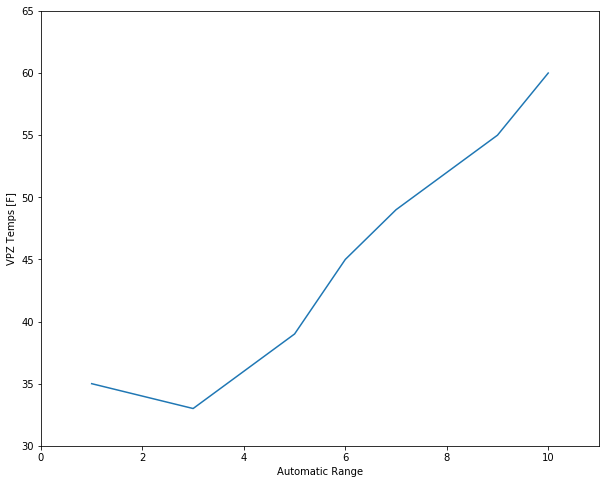

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10]
y = [35,34,33,36,39,45,49,52,55,60]

plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.axis([0,11,30,65])
plt.xlabel('Automatic Range')
plt.ylabel('VPZ Temps [F]')
plt.show()
#plt.savefig('pyplot_test_image.png', dpi=150)

The first line imports the pylab portion of the matplotlib module and calls it plt. We then set up two different one dimensional arrays x and y. We then use the pylab module (plt) to plot, set the axis, and axis labels. Finally, we show the image at the end. You could also save the image using the commented out line after the plt.show().

Pretty simple!

Go ahead and change the x array to be times. The observations were taken every hour beginning at 12 UTC and going to 21 UTC. Change the x array, and anything else that you could need to to reflect that change.


## Plotting $y=x^2$
We can use numpy to create an array of values, then compute a functions value for that entire array, then plot it up.

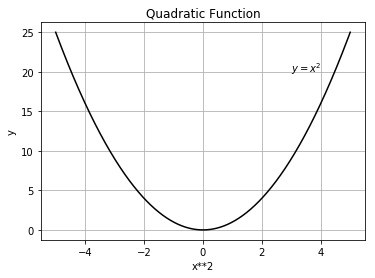

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 1000)
y = x**2

plt.plot(x, y, 'k')
plt.title('Quadratic Function')
plt.text(3, 20, r'$y = x^2$')
plt.xlabel('x**2')
plt.ylabel('y')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.grid()
plt.show()
#plt.savefig('quadratic_plot.png',dpi=150)

So <span style="font-family:Courier">np.linspace(-5.0,5.0,100)</span> creates a 100 element 1-D array from -5 to 5

In the end, your x and y values are just like columns in an excel spreadsheet that you use to then make an x-y plot.

Change the function for y in some way (and make any other changes as necessary) to create a different type of plot. You can also change the linestyle, line color, add markers, etc. Use the matplotlib website to try making changes.

1) What if you only had ten points for the x-array?

2) What if you had 1000 points for the x-array?

3) What does the <span style="font-family:Courier">sin(x)</span> function look like?

## NAO Example

Now lets make some plots with the NAO data we previously worked with.

1. make a plot of NAO data for the year you were born
2. plot all of the years in one continuous line from 2001 thourgh 2010. To accomplish the second part, you will need to figure out how to reduce (or ravel) a 2-D array to a 1-D array.


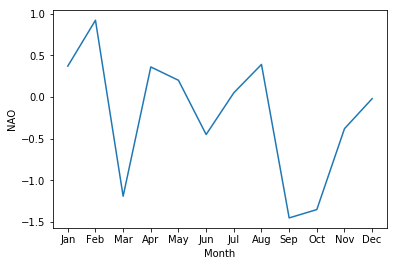

In [3]:
import numpy as np
nao_data = np.genfromtxt('nao.txt', skip_header=1, missing_values='-99.99', usemask=True)
iyear = np.where(nao_data[:,0]==1981)[0][0]
#print(iyear)
nao_1981 = nao_data[iyear,1:]
#print(nao_1981.shape)
x = range(1,13)
plt.plot(x,nao_1981)
plt.ylabel('NAO')
plt.xlabel('Month')
plt.xticks(x,['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [4]:
print(nao_data[-1])

[2017.0 0.48 1.0 0.74 1.73 -1.91 0.05 1.26 -1.1 -- -- -- --]


## Ravel Data Array for plotting
Ravelling an array means that we are attempting to reduce its dimensionality. For example, here we have a 2D array that we want to make into a 1D array for plotting. We can use the `ravel()` method that is attached to our array data.

In [5]:
nao_2001_2010 = nao_data[51:61,1:]
nao_2001_2010_1D = nao_2001_2010.ravel()

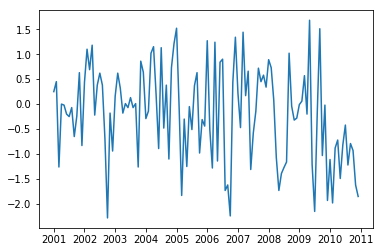

In [6]:
x = range(len(nao_2001_2010_1D))
plt.plot(x,nao_2001_2010_1D)
plt.xticks(range(0,121,12),[2001,2002,2003,2004,2005,
                            2006,2007,2008,2009,2010,2011])
plt.show()

## Plotting with missing data

There may be times when you run across data that has missing times, or levels, but you still want to be able to plot a continuous line. Luckily, numpy has some functions that can help with masking our arrays (which we previously talked about) and compressing them to create the ability to plot a continuous line.

Let's get started with making a new subset of our data and setting a years worth of data as missing.

In [7]:
nao_subset = nao_data[51:61,1:].data

# Set a year to missing value for illustrative purposes
nao_subset[4,:] = -99.99
print('Original Subset')
print(nao_subset)

Original Subset
[[  2.50000000e-01   4.50000000e-01  -1.26000000e+00   0.00000000e+00
   -2.00000000e-02  -2.00000000e-01  -2.50000000e-01  -7.00000000e-02
   -6.50000000e-01  -2.40000000e-01   6.30000000e-01  -8.30000000e-01]
 [  4.40000000e-01   1.10000000e+00   6.90000000e-01   1.18000000e+00
   -2.20000000e-01   3.80000000e-01   6.20000000e-01   3.80000000e-01
   -7.00000000e-01  -2.28000000e+00  -1.80000000e-01  -9.40000000e-01]
 [  1.60000000e-01   6.20000000e-01   3.20000000e-01  -1.80000000e-01
    1.00000000e-02  -7.00000000e-02   1.30000000e-01  -7.00000000e-02
    1.00000000e-02  -1.26000000e+00   8.60000000e-01   6.40000000e-01]
 [ -2.90000000e-01  -1.40000000e-01   1.02000000e+00   1.15000000e+00
    1.90000000e-01  -8.90000000e-01   1.13000000e+00  -4.80000000e-01
    3.80000000e-01  -1.10000000e+00   7.30000000e-01   1.21000000e+00]
 [ -9.99900000e+01  -9.99900000e+01  -9.99900000e+01  -9.99900000e+01
   -9.99900000e+01  -9.99900000e+01  -9.99900000e+01  -9.99900000e+01


## Masking the missing data
Now we want to use our ability to mask missing values (essentially setting them to not a number). So we are setting our missing value as -9.99, which is what it is in our original dataset.

In [8]:
# Mask the missing values
nao_subset_masked = np.ma.masked_array(nao_subset,mask=(nao_subset==-99.99))
print('Masked Subset')
print(nao_subset_masked)

Masked Subset
[[0.25 0.45 -1.26 0.0 -0.02 -0.2 -0.25 -0.07 -0.65 -0.24 0.63 -0.83]
 [0.44 1.1 0.69 1.18 -0.22 0.38 0.62 0.38 -0.7 -2.28 -0.18 -0.94]
 [0.16 0.62 0.32 -0.18 0.01 -0.07 0.13 -0.07 0.01 -1.26 0.86 0.64]
 [-0.29 -0.14 1.02 1.15 0.19 -0.89 1.13 -0.48 0.38 -1.1 0.73 1.21]
 [-- -- -- -- -- -- -- -- -- -- -- --]
 [1.27 -0.51 -1.28 1.24 -1.14 0.84 0.9 -1.73 -1.62 -2.24 0.44 1.34]
 [0.22 -0.47 1.44 0.17 0.66 -1.31 -0.58 -0.14 0.72 0.45 0.58 0.34]
 [0.89 0.73 0.08 -1.07 -1.73 -1.39 -1.27 -1.16 1.02 -0.04 -0.32 -0.28]
 [-0.01 0.06 0.57 -0.2 1.68 -1.21 -2.15 -0.19 1.51 -1.03 -0.02 -1.93]
 [-1.11 -1.98 -0.88 -0.72 -1.49 -0.82 -0.42 -1.22 -0.79 -0.93 -1.62 -1.85]]


In [9]:
# Again ravel the 2D array to a 1D array
print('Ravelled Array for plotting')
nao_sub_mask_flat = nao_subset_masked.ravel()
print(nao_sub_mask_flat)

Ravelled Array for plotting
[0.25 0.45 -1.26 0.0 -0.02 -0.2 -0.25 -0.07 -0.65 -0.24 0.63 -0.83 0.44 1.1
 0.69 1.18 -0.22 0.38 0.62 0.38 -0.7 -2.28 -0.18 -0.94 0.16 0.62 0.32 -0.18
 0.01 -0.07 0.13 -0.07 0.01 -1.26 0.86 0.64 -0.29 -0.14 1.02 1.15 0.19
 -0.89 1.13 -0.48 0.38 -1.1 0.73 1.21 -- -- -- -- -- -- -- -- -- -- -- --
 1.27 -0.51 -1.28 1.24 -1.14 0.84 0.9 -1.73 -1.62 -2.24 0.44 1.34 0.22
 -0.47 1.44 0.17 0.66 -1.31 -0.58 -0.14 0.72 0.45 0.58 0.34 0.89 0.73 0.08
 -1.07 -1.73 -1.39 -1.27 -1.16 1.02 -0.04 -0.32 -0.28 -0.01 0.06 0.57 -0.2
 1.68 -1.21 -2.15 -0.19 1.51 -1.03 -0.02 -1.93 -1.11 -1.98 -0.88 -0.72
 -1.49 -0.82 -0.42 -1.22 -0.79 -0.93 -1.62 -1.85]


So now we have 10 years worth of data (120 months) in a single 1D array that is now ready for plotting!

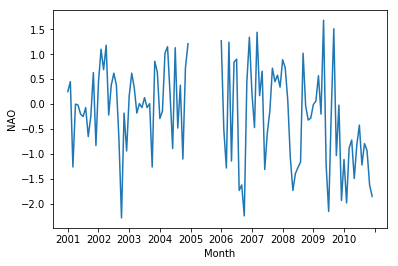

In [10]:
# Set some x-values for plotting
x = range(120)

plt.plot(x,nao_sub_mask_flat)
plt.ylabel('NAO')
plt.xlabel('Month')
plt.xticks(range(0,121,12),[2001,2002,2003,2004,2005,
                            2006,2007,2008,2009,2010])
plt.show()

Nice! But we have a gap in the data in 2005...what can we do if we wanted to mind the gap?

We need to compress both our x-values and our y-values!

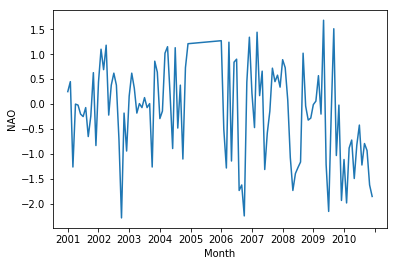

In [11]:
x = range(120)
# The following line will use the mask (basically an array of True/False values)
#  from our masked nao variable (nao_sub_mask_flat) to provide the same mask
#  to our x array values
x_masked = np.ma.masked_array(x,nao_sub_mask_flat.mask)

plt.plot(np.ma.compressed(x_masked),np.ma.compressed(nao_sub_mask_flat))
plt.ylabel('NAO')
plt.xlabel('Month')
plt.xticks(range(0,121,12),[2001,2002,2003,2004,2005,
                            2006,2007,2008,2009,2010])
plt.show()

And now we have bridged the gap between the known data points. We probably wouldn't want to bridge this gap in reality, but it offers a nice example with the dataset that we have been working with.